In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas

In [22]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [20]:
# or you can also use 'mount with google Drive' and link to favorite file:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pandas.read_csv("/content/drive/MyDrive/send_To_githab/Position_Salaries.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
dataset = pandas.read_csv("Position_Salaries.csv")
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [24]:
X_l = dataset.iloc[:, -2].values
print(X_l)

[ 1  2  3  4  5  6  7  8  9 10]


In [25]:
y_p = dataset.iloc[:, -1].values
print(y_p)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
#               (ستون4             ستون3             ستون2             ستون1  )
#              ( 0 OR -4           1 OR -3            2 OR -2           3 OR -1        )

In [ ]:
# مقادیر وای پی خیلی بزرگتر از مقادیر ایکس ال هستند. بنابراین باید سعی کنیم که
# مقادیر آنها در یک محدوده باشند و خیلی بزرگ و کوچک نباشند
# کلاسی که میخواهیم برای مقیاس بندی داده ها استفاده کنیم یک آرایه دو بعدی میگیرد.
# بنابراین مقادیر وای پی باید از یک بعد به دو بعد تغییر کند

In [26]:
# با دستور زیر میخواهیم مقادیر ایکس ال و  وای پی را دو بعدی کنیم
X_l = X_l.reshape(-1,1)
y_p = y_p.reshape(-1,1)


In [27]:
print(X_l)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [28]:
print(y_p)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
# اکنون کلاس استاندارد کلاس  را وارد کرده و مقیاس های متغیرهای ایکس ال  و وای پی  را به طور جداگانه تغییر دهید

In [29]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p)

In [30]:
print("Scaled X_l:")
print(X_l)

Scaled X_l:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [31]:
print("Scaled y_p:")
print(y_p)

Scaled y_p:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
# همانطور که ملاحظه میشود داده های ما در محدوده مثبت 3 تا منفی 3 مقیاس شده اند

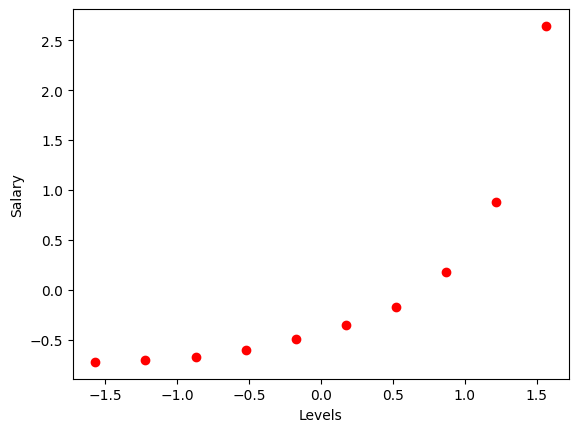

In [32]:
plt.scatter(X_l, y_p, color = 'red')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

In [ ]:
# تا اینجا یکسری عملیات روی دیتا انجام دادیم
# تا اینجا فهمیدیم ارتباط بین دو لول ها و شهریه ها به صورت غیر خطی است بنابراین نمیتوانیم از اس وی آر خطی استفاده کنیم
# برای همین برای یافتن ارتباط از اس وی آر  با تابع کرنل استفاده میکنیم
# کار الگوریتم اس وی آر از اینجا به بعد آغاز میشود

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
# Radial Basis function = (RBF)   # در واقع از اس وی آر غیرخطی استفاده میکنیم
regressor.fit(X_l, y_p)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
A=regressor.predict(StdS_X.transform([[6.5]]))
print(A)

[-0.27861589]


In [ ]:
# همانطور که میبینی مقدار شهریه پیش بینی شده است اما بر اساس مقادیر مقیاس شده.
# ولی آنچه در واقع مورد نیاز ما است ، مقدار بر اساس حالت مقیاس نشده است.


In [ ]:
# اکنون برای بازگشت به متغیر مطالعه واقعی، برنامه ای می نویسیم که...
# هدف آن گرفتن مقادیر پیش بینی شده در محدوده مقیاس شده و تبدیل آنها به مقیاس واقعی است.

In [ ]:
# در اینجا و برای انجام این عملیات هم باید ابتدا مقادیر یک بعدی به دو بعدی تبدیل شوند
#  A را از یک بعد به دو بعد تبدیل میکنیم


In [35]:
A = A.reshape(-1,1)
print(A)

[[-0.27861589]]


In [ ]:
# از این خروجی مشخص است که یک آرایه دوبعدی داریم

In [ ]:
# حال با استفاده از تابع  ()inverse_transform
# میتوانیم این مقدار مقیاس شده را به مقدار مقیاس نشده که مدنظرمان است تبدیل کنیم

In [36]:
A_pred = StdS_y.inverse_transform(A)
print(A_pred)

[[170370.0204065]]


In [ ]:
# اپتیمایز کردن :
# چندخط دستور بالا را میتوان در یک خط به صورت زیر خلاصه کرد:

In [37]:
B_pred = StdS_y.inverse_transform(regressor.predict(StdS_X.transform([[6.5]])).reshape(-1,1))
print(B_pred)

[[170370.0204065]]
